In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# cache the downloaded dataset into 'data_home'
mnist = fetch_openml('mnist_784', version=1, cache=True)

In [5]:
data = mnist['data']
target = mnist['target']

In [6]:
X_train, X_test, y_train, y_test = data[:5000], data[5000:], target[:5000], target[5000:]

y_train = y_train.astype('int')
y_test = y_test.astype('int')

X_train = X_train.sample(frac=1, random_state=42).reset_index(drop=True)
y_train = y_train.sample(frac=1, random_state=42).reset_index(drop=True)

In [7]:
# initiate sgd classifier.
sgd_clf = SGDClassifier(random_state=42)

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)

In [9]:
# Lets take a look at one digit from the datatset. 
# Grab an random instance's feature vector, reshape it to a 28X28 array, and display the same
# using matplotlib's imshow() function.
def display_image(data, random_number):
    """
    
    :param data: 
    :param idx: 
    :return: 
    """
    some_digital_image = np.array(data.iloc[random_number, :]).reshape(28, 28)
    plt.imshow(some_digital_image, cmap=matplotlib.cm.binary, interpolation='nearest')
    plt.show()
    
    return None

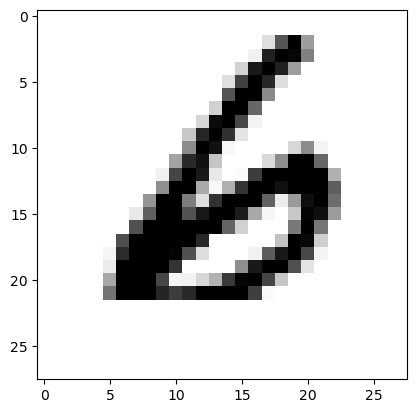

In [10]:
random_number = 2212
some_digit = X_train.iloc[random_number, :]
display_image(X_train, random_number)

In [11]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.values.reshape(size, size) for _, instance in instances.iterrows()]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row: (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap=matplotlib.cm.binary, **options)
    plt.axis("off")

In [12]:
cl_a, cl_b = '3', '5'
X_aa = X_train.loc[(y_train == cl_a) & (y_train_pred == cl_a), :]
X_bb = X_train.loc[(y_train == cl_b) & (y_train_pred == cl_b), :]
X_ab = X_train.loc[(y_train == cl_a) & (y_train_pred == cl_b), :]
X_ba = X_train.loc[(y_train == cl_b) & (y_train_pred == cl_a), :]

ZeroDivisionError: integer division or modulo by zero

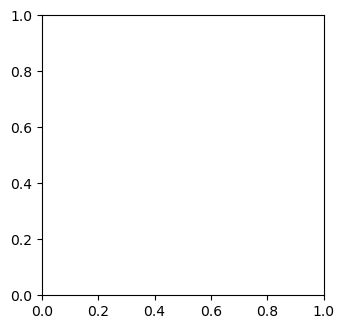

In [13]:
plt.figure(figsize=(8, 8))
plt.subplot(221); plot_digits(X_aa.iloc[:23, :], images_per_row=5)
plt.subplot(222); plot_digits(X_ab.iloc[:23, :], images_per_row=5)
plt.subplot(223); plot_digits(X_ba.iloc[:23, :], images_per_row=5)
plt.subplot(224); plot_digits(X_bb.iloc[:23, :], images_per_row=5)
plt.show()

In [14]:
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [15]:
knn_clf.predict([some_digit])

array([[False, False]])

In [22]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3)
print(f1_score(y_train, y_train_knn_pred, average='macro'))

0.9272622505547036


In [24]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
print(f1_score(y_multilabel, y_train_knn_pred, average='weighted'))

0.9528045001904678


In [35]:
noise = np.random.randint(0, 100, size=(len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, size=(len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

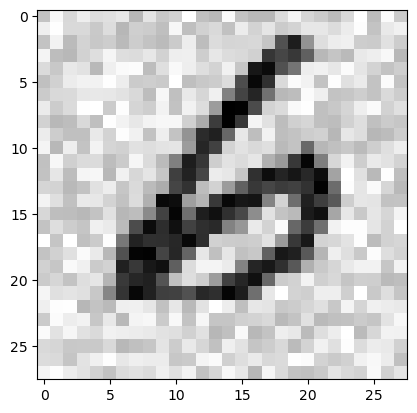

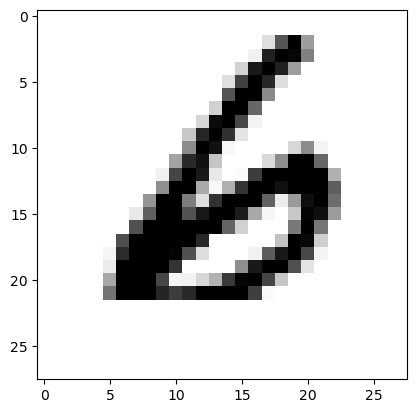

In [36]:
random_number = 2212
display_image(X_train_mod, random_number)
display_image(X_train, random_number)

In [41]:
some_noisy_digit = X_train_mod.iloc[random_number, :]
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([some_noisy_digit])

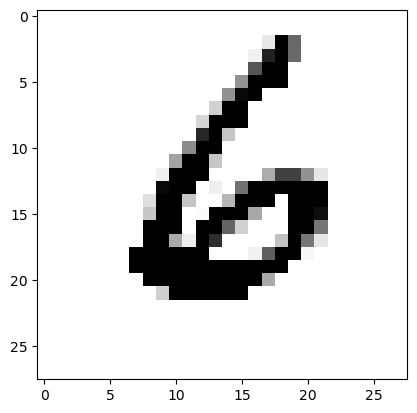

In [44]:
plt.imshow(clean_digit.reshape(28, 28), cmap=matplotlib.cm.binary, interpolation='nearest')
plt.show()